<a href="https://colab.research.google.com/github/mehdiansar/ACID/blob/master/T3_ex2_mlp_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST CNN with Tensorflow|Keras

# 1. Import libraries and modules

In [ ]:

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout , Flatten
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

TensorFlow version: 2.15.0


# 2. Load pre-shuffled HODA data into train and test sets

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [ ]:
print("train_image shape:", train_images.shape)
print("train_labels shape:", train_labels.shape)

train_image shape: (60000, 28, 28)
train_labels shape: (60000,)


In [ ]:
train_images.shape

(60000, 28, 28)

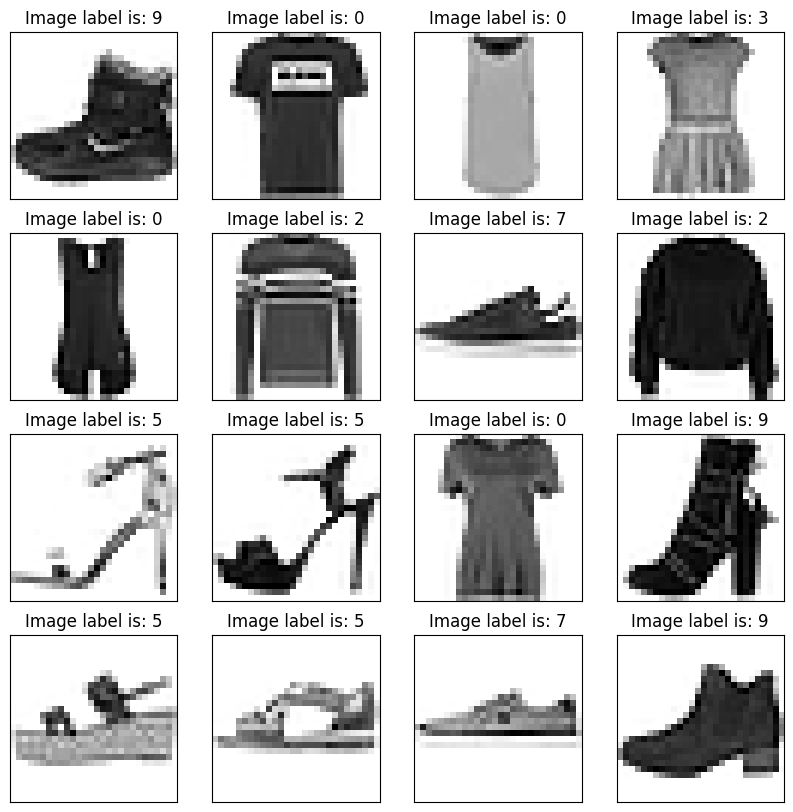

In [ ]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.title("Image label is: {}".format(train_labels[i]))
plt.show()

In [ ]:
# train_images = train_images.reshape((-1, 28 * 28))
train_images = train_images.astype("float32") / 255
# test_images = test_images.reshape((-1, 28 * 28))
test_images = test_images.astype("float32") / 255

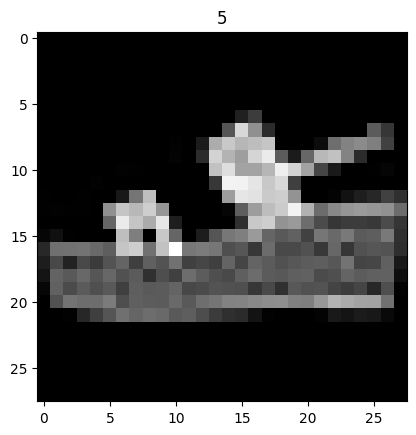

In [ ]:
i = 12
plt.imshow(train_images[i], cmap = 'gray')
plt.title(train_labels[i]);

# 3. Preprocess input data
'''3.2 normalize our data values to the range [0, 1]'''

In [ ]:
# train_images = train_images.reshape((-1, 28 * 28))
train_images = train_images.astype("float32") / 255
# test_images = test_images.reshape((-1, 28 * 28))
test_images = test_images.astype("float32") / 255


# 4. Preprocess class labels

In [ ]:
train_images.shape

(60000, 28, 28)

# with reshape 28*28

In [ ]:
train_images_reshape = train_images.reshape((60000, 28 * 28))
# train_images_reshape = train_images.astype("float32") / 255
test_images_reshape = test_images.reshape((10000, 28 * 28))
# test_images_reshape = test_images.astype("float32") / 255

In [ ]:
model = Sequential()
# building sequential model
model.add(Dense(100, activation='relu'))
model.add(Dense(70, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [ ]:
# summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 70)                7070      
                                                                 
 dense_2 (Dense)             (None, 50)                3550      
                                                                 
 dense_3 (Dense)             (None, 20)                1020      
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
Total params: 90350 (352.93 KB)
Trainable params: 90350 (352.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer ,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
# "Fitting" the model

model.fit(train_images_reshape, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 8ms/step - loss: 0.2544 - accuracy: 0.9054
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2503 - accuracy: 0.9078
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2487 - accuracy: 0.9070
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2457 - accuracy: 0.9101
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.2435 - accuracy: 0.9105


In [ ]:
# Evaluating the model on new data

test_loss, test_acc = model.evaluate(test_images_reshape, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 2s 4ms/step - loss: 0.3521 - accuracy: 0.8745
test_acc: 0.8744999766349792


# without reshape

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train[:4000], X_train[4000:] / 255
y_valid, y_train = y_train[:4000], y_train[4000:]
X_test = X_test / 255

In [ ]:
# creating validation data snd scaling data to range (0-1)
X_valid, X_train = X_train[:4000], X_train[4000:] / 255
y_valid, y_train = y_train[:4000], y_train[4000:]
X_test = X_test / 255

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])


# 6. Compile model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# building sequential model

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = [28, 28]),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(70, activation = 'relu'),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
# compiling model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])


In [ ]:
# fitting model
model_history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 50)


Epoch 1/50
1625/1625 [==============================] - 14s 8ms/step - loss: 1.0484 - accuracy: 0.5844 - val_loss: 109.2510 - val_accuracy: 0.5403
Epoch 2/50
1625/1625 [==============================] - 12s 7ms/step - loss: 0.6947 - accuracy: 0.7405 - val_loss: 99.0409 - val_accuracy: 0.6215
Epoch 3/50
1625/1625 [==============================] - 14s 9ms/step - loss: 0.5840 - accuracy: 0.7871 - val_loss: 101.0378 - val_accuracy: 0.6373
Epoch 4/50
1625/1625 [==============================] - 19s 12ms/step - loss: 0.5300 - accuracy: 0.8111 - val_loss: 88.0255 - val_accuracy: 0.6697
Epoch 5/50
1625/1625 [==============================] - 13s 8ms/step - loss: 0.4981 - accuracy: 0.8213 - val_loss: 86.8480 - val_accuracy: 0.6747
Epoch 6/50
1625/1625 [==============================] - 9s 5ms/step - loss: 0.4750 - accuracy: 0.8291 - val_loss: 79.8304 - val_accuracy: 0.7003
Epoch 7/50
1625/1625 [==============================] - 9s 6ms/step - loss: 0.4547 - accuracy: 0.8376 - val_loss: 82.5139 

In [ ]:
# Evaluating the model on new data

test_loss_r, test_acc_r = model.evaluate(X_test,y_test )
print(f"test_acc_r: {test_acc_r}")

313/313 [==============================] - 2s 5ms/step - loss: 0.3521 - accuracy: 0.8745
test_acc_r: 0.8744999766349792


https://www.kaggle.com/code/niteshyadav3103/image-classification-with-ann
